In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
def ignore_warn(*args,**kwargs):
    pass
warnings.warn=ignore_warn
#https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/notebook

In [4]:
data=pd.read_csv('Data/ameshousingdata.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [110]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train_id=data['Id']
data.drop("Id",axis=1,inplace=True)
data.shape

(1460, 80)

In [7]:
#classifing numeric and categorical columns
all_data=data.columns
numeric=data._get_numeric_data().columns
categorical=list(set(all_data)-set(numeric))
print("Numeric:\n"+str(numeric))
print("Categorical:\n"+str(categorical))

Numeric:
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical:
['BsmtExposure', 'Condition2', 'BsmtQual', 'Functional', 'MasVnrType', 'BsmtFinType2', 'SaleType', 'RoofStyle', 'HeatingQC', 'MiscFeature', 'LotConfig', 'BldgType', 'Exterior2nd', 'CentralAir', 'BsmtCond', 'HouseStyle', 'GarageQual', 'LotShape', 'Alley', 'KitchenQual', 'LandContour', 'FireplaceQu', 'SaleCondition', 'RoofMatl', 'Heating', 'Fence', 'ExterQual', 'Electrical', 'PoolQC', 

In [8]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


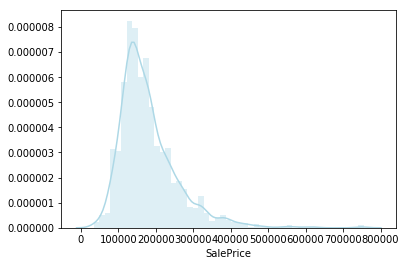

In [9]:
sns.distplot(data['SalePrice'],color='lightblue')
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

## DATA VISUALIZATION

Numerical Features

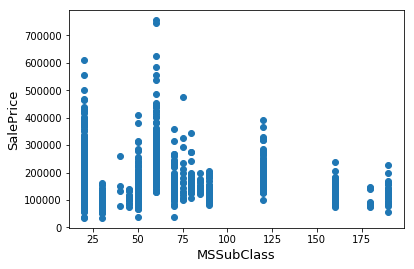

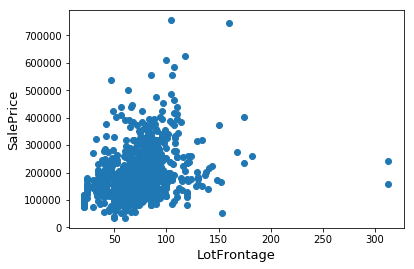

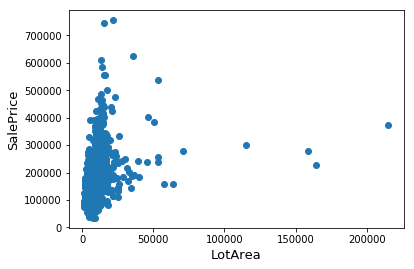

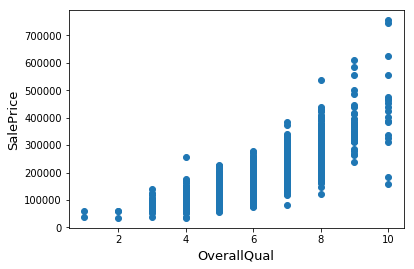

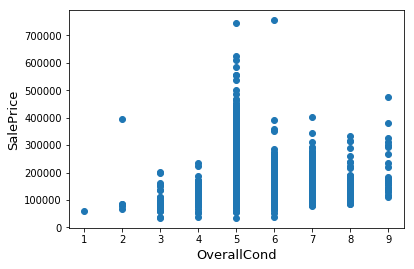

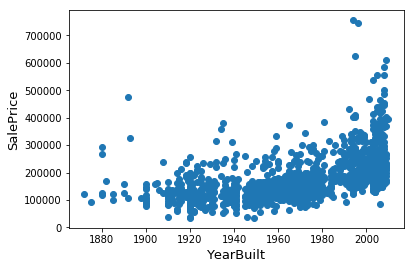

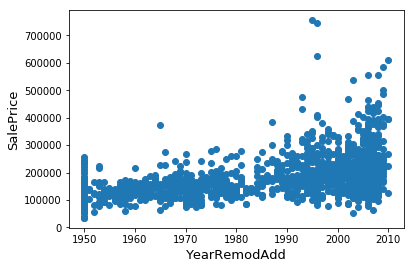

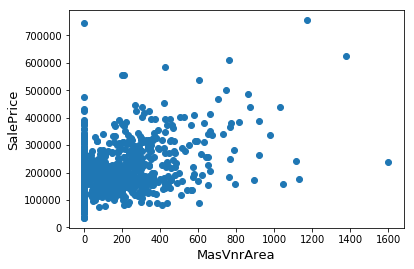

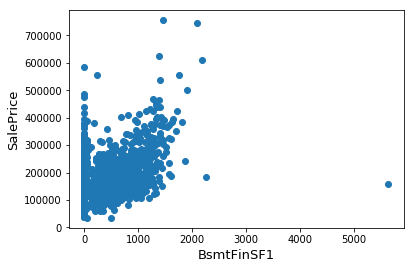

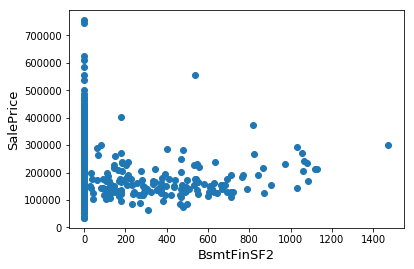

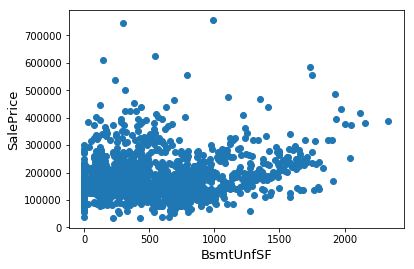

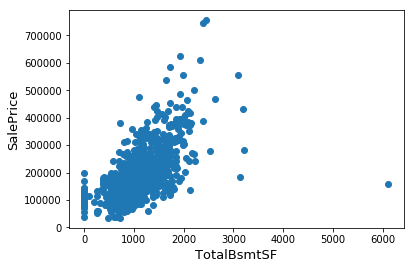

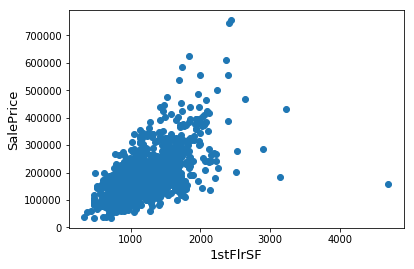

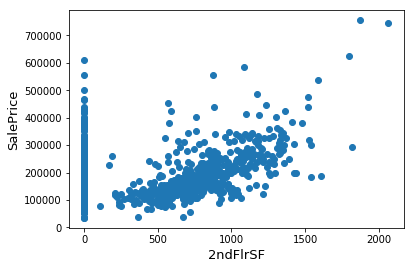

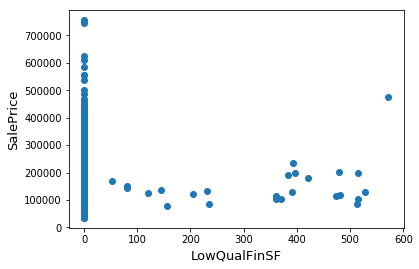

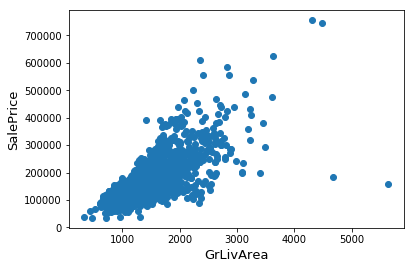

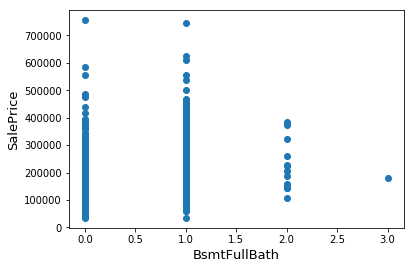

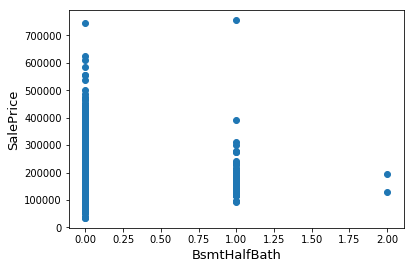

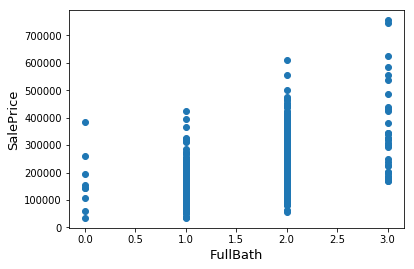

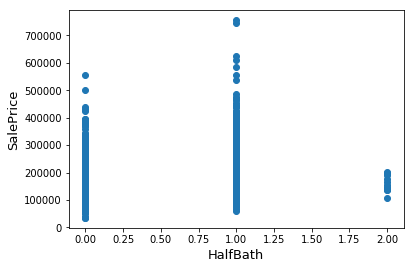

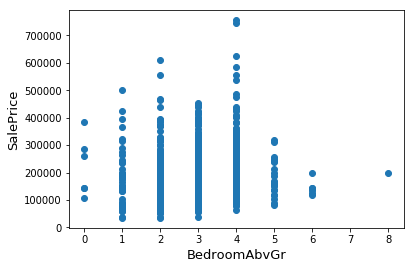

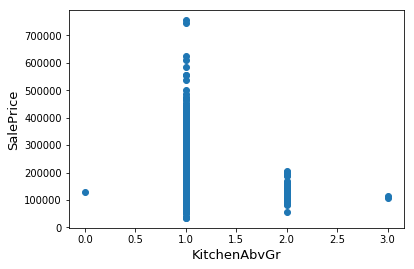

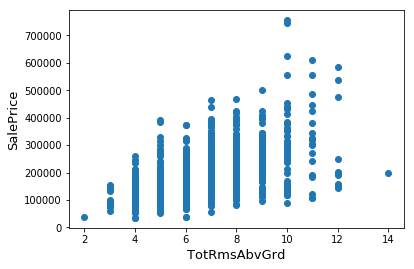

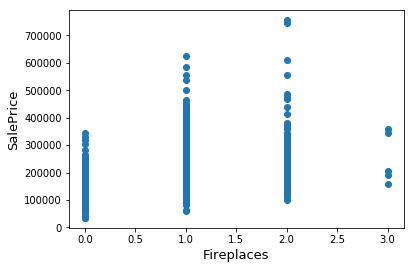

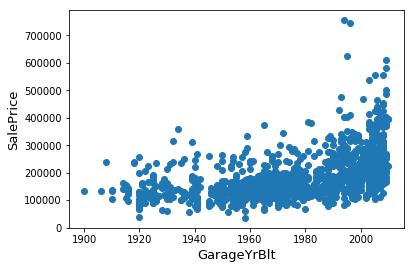

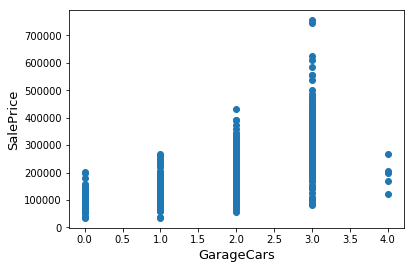

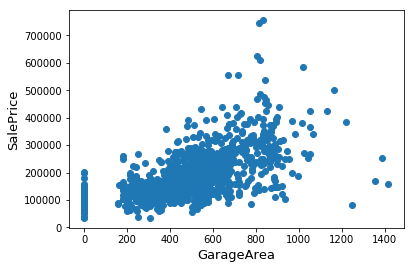

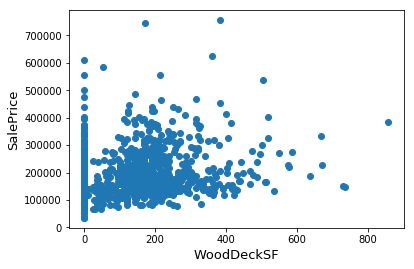

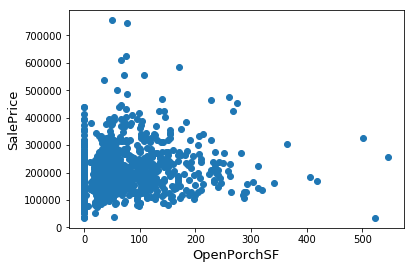

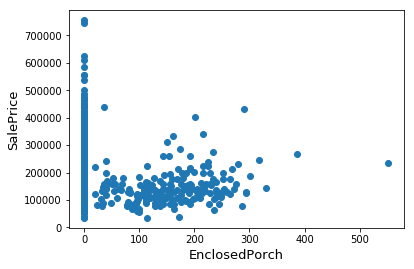

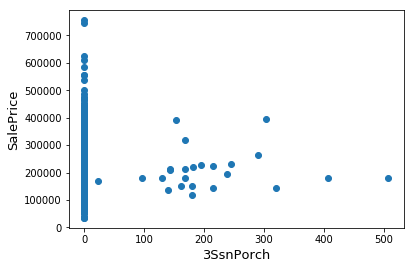

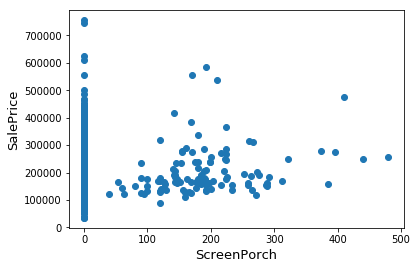

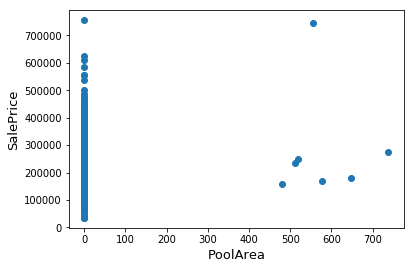

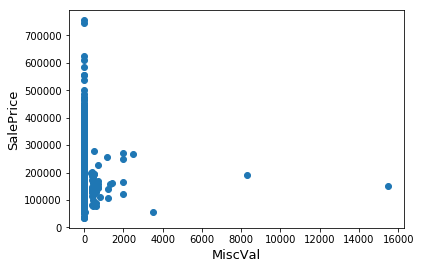

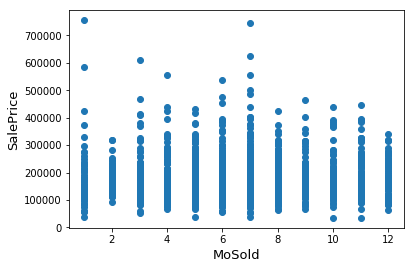

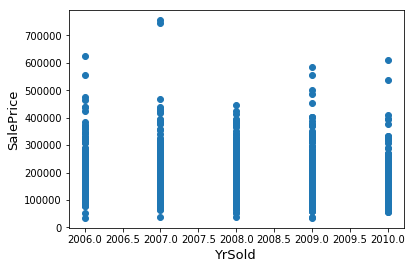

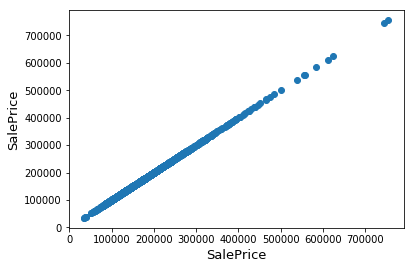

In [10]:
for col in numeric:
    fig, ax = plt.subplots()
    ax.scatter(x = data[col], y = data['SalePrice'])
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(col, fontsize=13)
    plt.show()

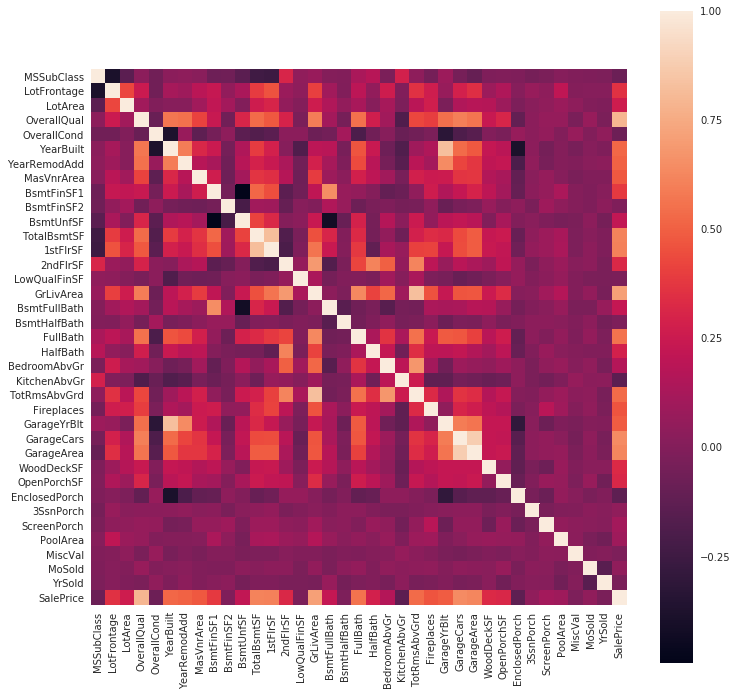

In [116]:
#correlation of numerical Features
corr=data.select_dtypes(include=['float64','int64']).iloc[:,1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

In [117]:
cor_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Sale Price:

OverallQual: 	0.7909816005838047
GrLivArea: 	0.7086244776126511
GarageCars: 	0.640409197258349
GarageArea: 	0.6234314389183598
TotalBsmtSF: 	0.6135805515591944
1stFlrSF: 	0.6058521846919166
FullBath: 	0.5606637627484452
TotRmsAbvGrd: 	0.5337231555820238
YearBuilt: 	0.5228973328794967
YearRemodAdd: 	0.5071009671113867
GarageYrBlt: 	0.48636167748786213
MasVnrArea: 	0.4774930470957107
Fireplaces: 	0.4669288367515242
BsmtFinSF1: 	0.38641980624215627
LotFrontage: 	0.35179909657067854
WoodDeckSF: 	0.32441344456813076
2ndFlrSF: 	0.31933380283206614
OpenPorchSF: 	0.31585622711605577
HalfBath: 	0.2841076755947784
LotArea: 	0.2638433538714063
BsmtFullBath: 	0.22712223313149718
BsmtUnfSF: 	0.214479105546969
BedroomAbvGr: 	0.1682131543007415
KitchenAbvGr: 	-0.1359073708421417
EnclosedPorch: 	-0.12857795792595636
ScreenPorch: 	0.11144657114291048
PoolArea: 	0.09240354949187278
MSSubClass: 	-0.08428413512659523
OverallCon

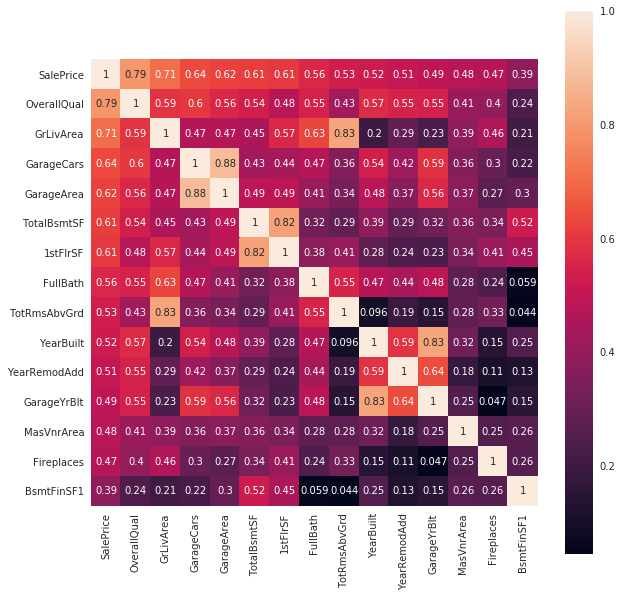

In [118]:
#We find the top 15 numeric features whose absolute value is highly correlated the reponse variable: "Sales Price"
corr_mat=data.corr().abs()
k=15
cols_index=corr_mat.nlargest(k,'SalePrice')['SalePrice'].index
data_mod=data[cols_index]
corr_mat=data_mod.corr()

fig, ax = plt.subplots(figsize=(10,10))
hm = sns.heatmap(corr_mat,yticklabels=cols_index.values, xticklabels=cols_index.values,  annot=True,annot_kws={'size': 10}, ax=ax, square= True )
plt.show()

We look for features that have very high correlation with each other:

GrLivArea is highly correlated with TotRmsAbvGrd (0.83)
<br>GarageArea is highly correlated with GarageCars (0.88)
<br>1stFlrSF is highly correlated with TotalBsmtSF (0.82)
<br>YearBuilt is highly correlated with GarageYrBlt (0.82)

We hence, need not use the latter features in our prediction models, as they provide no addional infomation.
Also, we do not include features that have absolute correlation < 0.5 with the SalesPrice

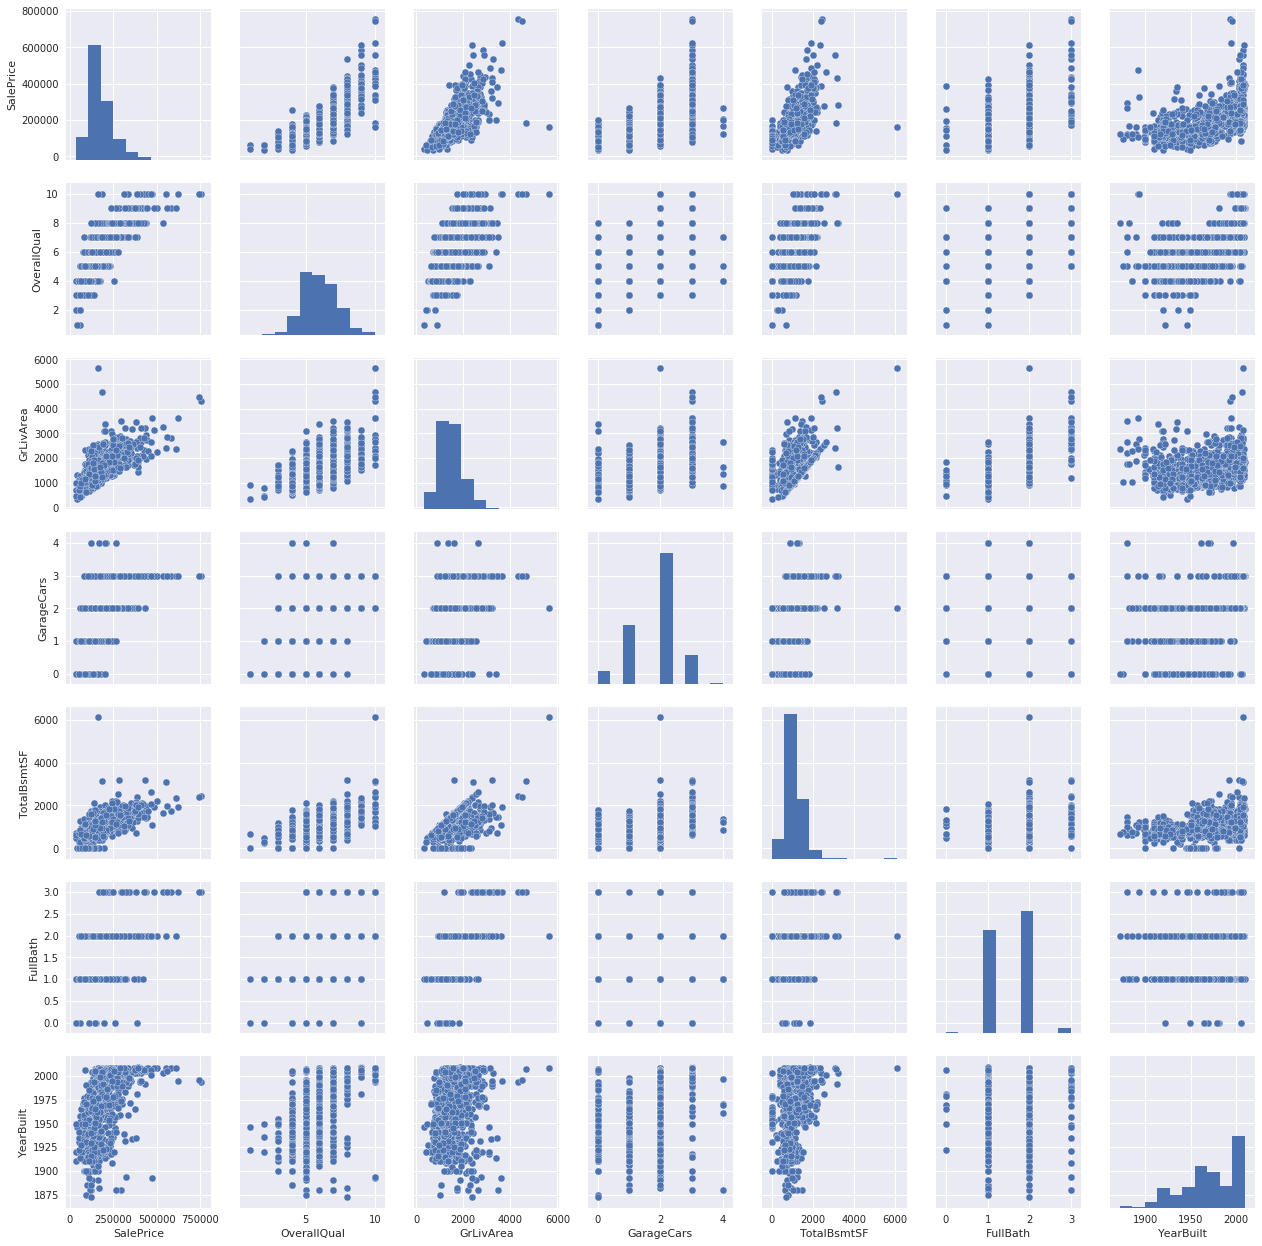

In [119]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[cols], size = 2.5)
plt.show();

In [120]:
data[cols].isnull().any()

SalePrice      False
OverallQual    False
GrLivArea      False
GarageCars     False
TotalBsmtSF    False
FullBath       False
YearBuilt      False
dtype: bool

Categorical Features

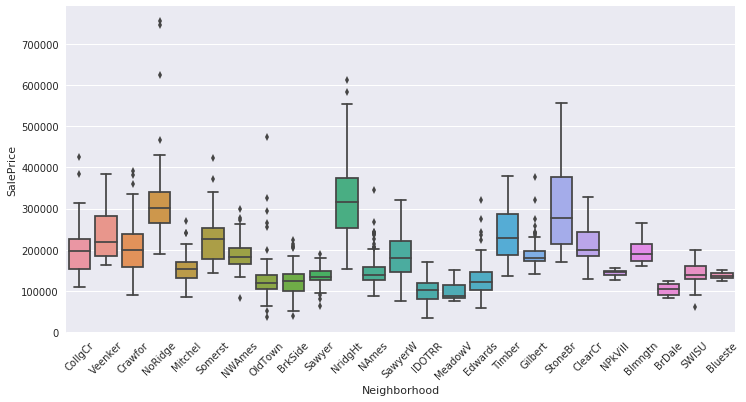

In [121]:
#Neighbour
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = data)
xt = plt.xticks(rotation=45)

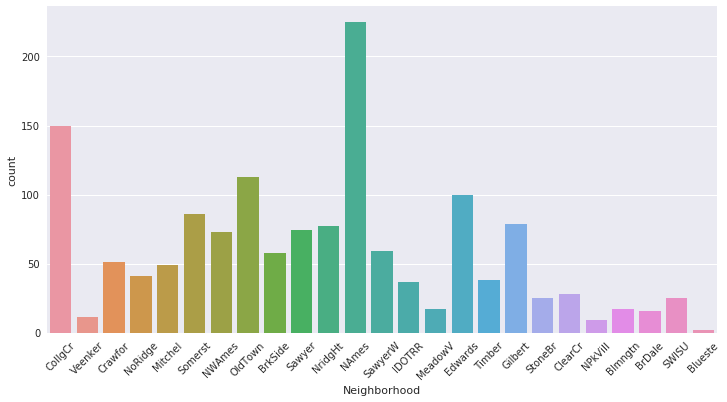

In [122]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = data)
xt = plt.xticks(rotation=45)

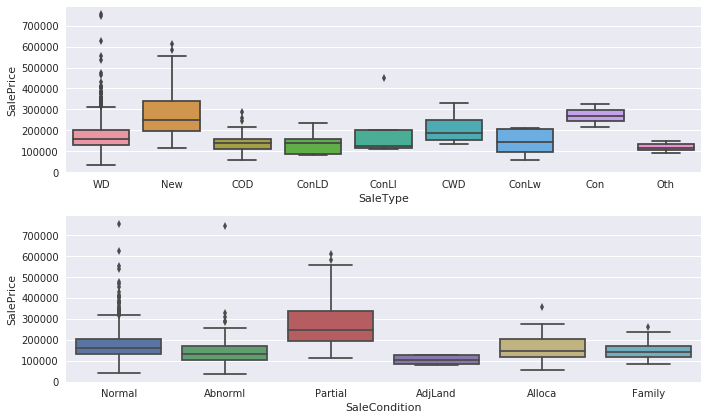

In [123]:
#saleType & condition  vs SalePrice
fig,ax=plt.subplots(2,1,figsize=(10,6))
sns.boxplot(x='SaleType',y='SalePrice',data=data,ax=ax[0])
#Sales Seasonality vs SalePrice
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = data, ax = ax[1])
plt.tight_layout()

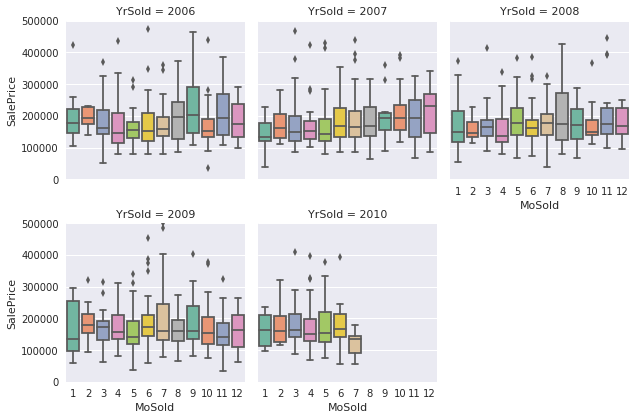

In [124]:
g = sns.FacetGrid(data, col = 'YrSold', col_wrap = 3)
g.map(sns.boxplot, 'MoSold', 'SalePrice', palette='Set2', order = range(1, 13))\
.set(ylim = (0, 500000))
plt.tight_layout()

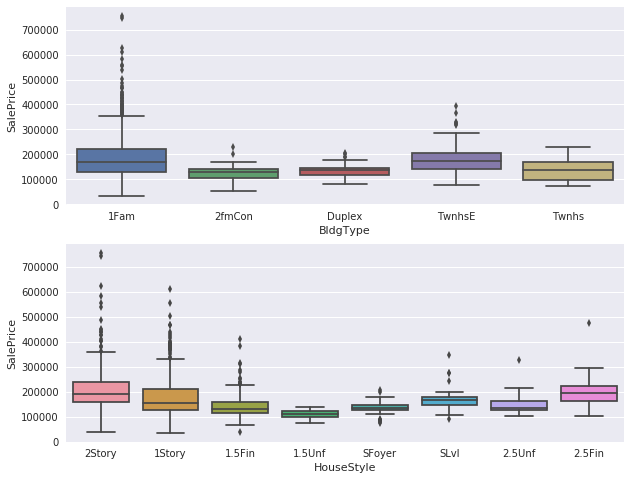

In [125]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = data, ax = ax[0])
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = data, ax = ax[1])

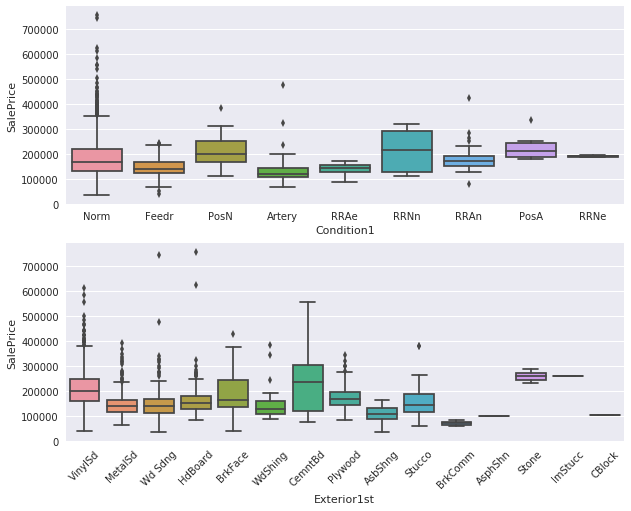

In [126]:
#Housing Condition
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = data, ax = ax[0])
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = data, ax = ax[1])
x = plt.xticks(rotation = 45)
plt.show()

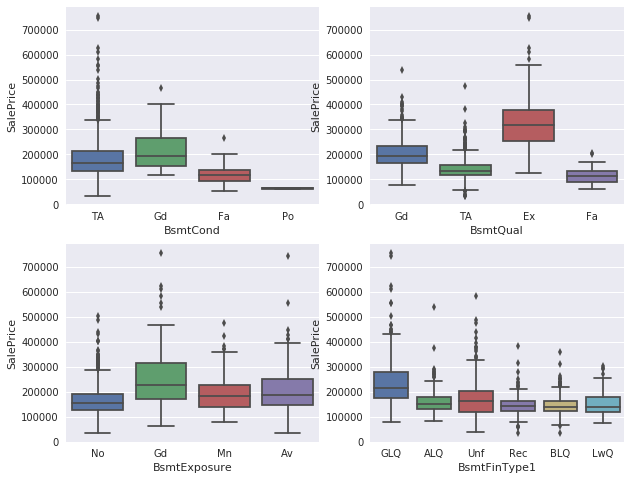

In [127]:
#basement Conditions
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
sns.boxplot('BsmtCond', 'SalePrice', data = data, ax = ax[0, 0])
sns.boxplot('BsmtQual', 'SalePrice', data = data, ax = ax[0, 1])
sns.boxplot('BsmtExposure', 'SalePrice', data = data, ax = ax[1, 0])
sns.boxplot('BsmtFinType1', 'SalePrice', data = data, ax = ax[1, 1])

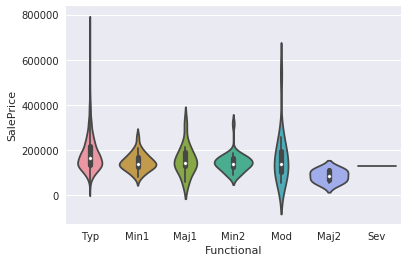

In [128]:
#home Functionality
sns.violinplot('Functional', 'SalePrice', data = data)

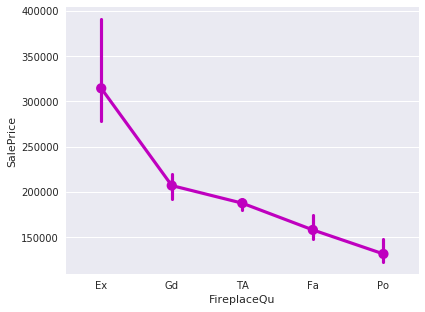

In [129]:
sns.factorplot('FireplaceQu', 'SalePrice', data = data, color = 'm', \
               estimator = np.median, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], size = 4.5,  aspect=1.35)

In [130]:
pd.crosstab(data.Fireplaces, data.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
Fireplaces,,,,,
1,19,28,324,20,259
2,4,4,54,0,53
3,1,1,2,0,1


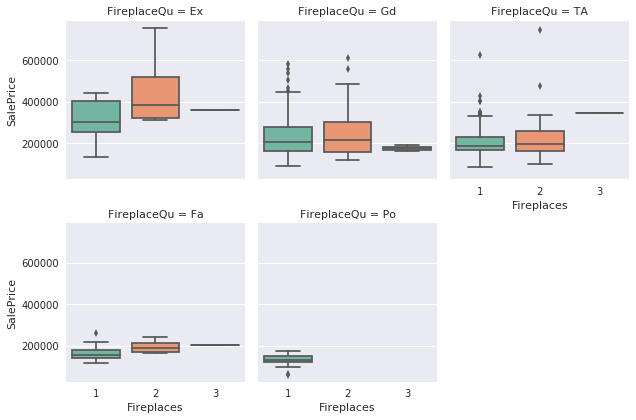

In [131]:
g = sns.FacetGrid(data, col = 'FireplaceQu', col_wrap = 3, col_order=['Ex', 'Gd', 'TA', 'Fa', 'Po'])
g.map(sns.boxplot, 'Fireplaces', 'SalePrice', order = [1, 2, 3], palette = 'Set2')

In [132]:
#heating since ames is a cold place in winter
pd.crosstab(data.HeatingQC, data.CentralAir)

CentralAir,N,Y
HeatingQC,,
Ex,8,733
Fa,24,25
Gd,13,228
Po,1,0
TA,49,379


In [133]:
pd.crosstab(data.HeatingQC, data.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
HeatingQC,,,,,
Ex,22,14,254,4,160
Fa,0,1,13,1,5
Gd,2,3,45,5,57
TA,0,15,68,10,91


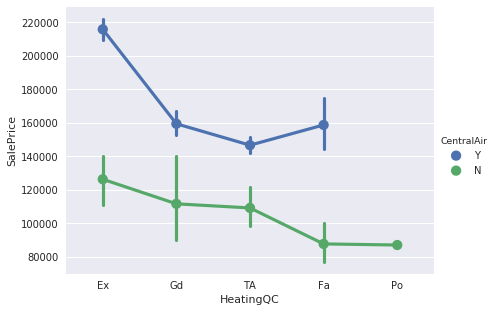

In [134]:
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', estimator = np.mean, data = data, 
             size = 4.5, aspect = 1.4)

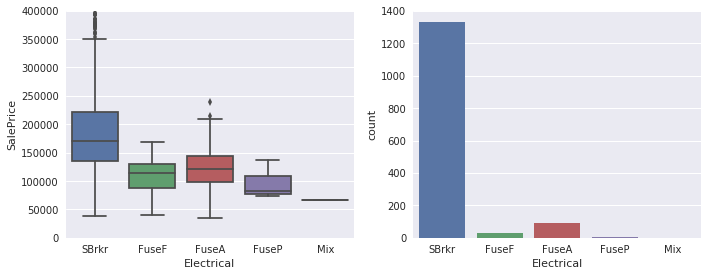

In [135]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot('Electrical', 'SalePrice', data = data, ax = ax[0]).set(ylim = (0, 400000))
sns.countplot('Electrical', data = data)
plt.tight_layout()

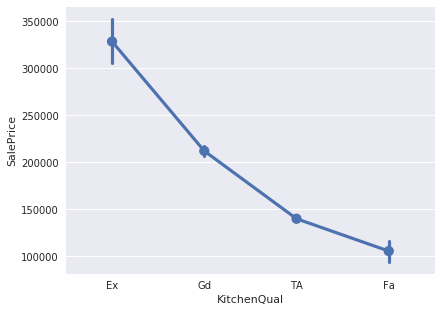

In [136]:
sns.factorplot('KitchenQual', 'SalePrice', estimator = np.mean, 
               size = 4.5, aspect = 1.4, data = data, order = ['Ex', 'Gd', 'TA', 'Fa'])

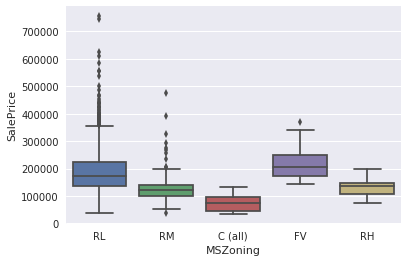

In [137]:
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = data)

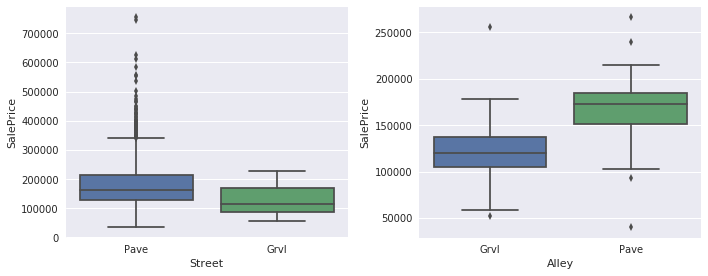

In [138]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot(x = 'Street', y = 'SalePrice', data = data, ax = ax[0])
sns.boxplot(x = 'Alley', y = 'SalePrice', data = data, ax = ax[1])
plt.tight_layout()

In [161]:
data=pd.read_csv('Data/ameshousingdata.csv')

Missing Data

In [4]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

In what concerns the remaining cases, we can see that 'GarageX' variables have the same number of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20 in5  problems). Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

In [5]:
data=data.drop((missing_data[missing_data['Total']>1]).index,1)
data=data.drop(data.loc[data['Electrical'].isnull()].index)
data.isnull().sum().max()

0

Outliers

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [6]:
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(data['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


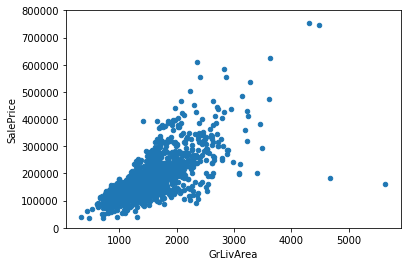

In [7]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
d = pd.concat([data['SalePrice'], data[var]], axis=1)
d.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening.These two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [8]:

data.sort_values(by = 'GrLivArea', ascending = False)[:2]
data = data.drop(data[data['Id'] == 1299].index)
data = data.drop(data[data['Id'] == 524].index)

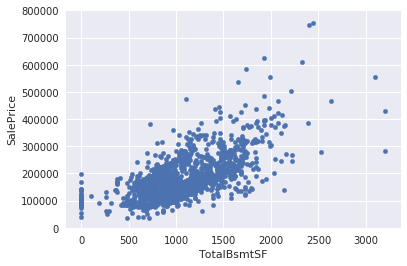

In [167]:
#bivariate analysis saleprice/TotalBsmtSF
var = 'TotalBsmtSF'
d = pd.concat([data['SalePrice'], data[var]], axis=1)
d.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

According to Hair et al. (2013), four assumptions should be tested:

Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

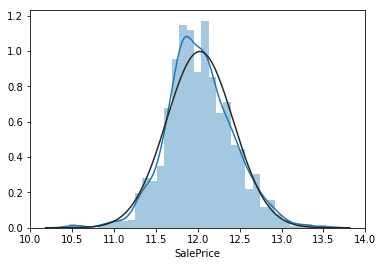

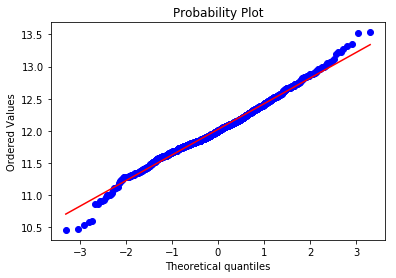

In [11]:
#NORMALITY
#histogram and normal probability plot
from scipy import stats
from scipy.stats import norm
sns.distplot(data['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(data['SalePrice'],plot=plt)

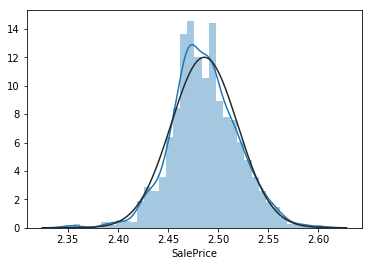

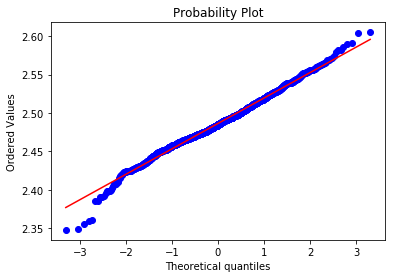

In [12]:
#positive skewness thus apply log transformations
data['SalePrice']=np.log(data['SalePrice'])
sns.distplot(data['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(data['SalePrice'],plot=plt)

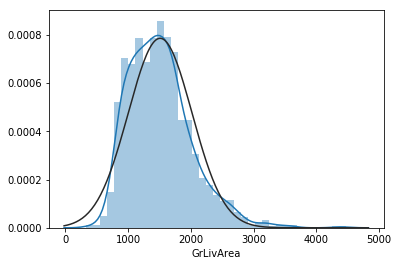

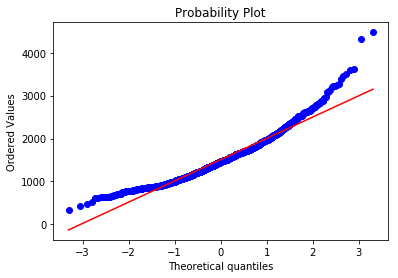

In [13]:
sns.distplot(data['GrLivArea'],fit=norm)
fig=plt.figure()
res=stats.probplot(data['GrLivArea'],plot=plt)

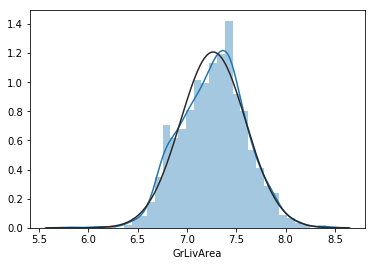

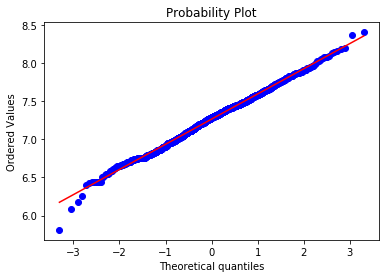

In [14]:
#positive skewness thus apply log transformations
data['GrLivArea']=np.log(data['GrLivArea'])
sns.distplot(data['GrLivArea'],fit=norm)
fig=plt.figure()
res=stats.probplot(data['GrLivArea'],plot=plt)

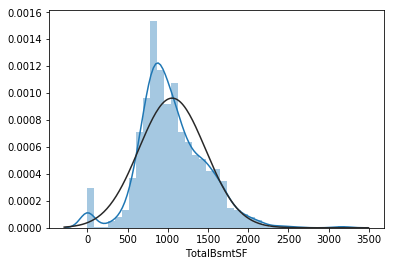

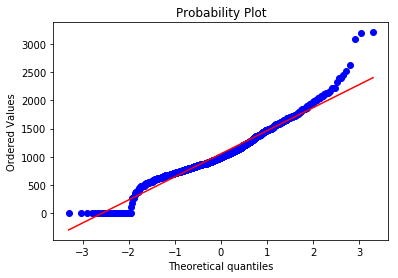

In [15]:
sns.distplot(data['TotalBsmtSF'],fit=norm)
fig=plt.figure()
res=stats.probplot(data['TotalBsmtSF'],plot=plt)

A significant number of observations with value zero (houses without basement).The value zero doesn't allow us to do log transformations.

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

In [16]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
data['HasBsmt'] = pd.Series(len(data['TotalBsmtSF']), index=data.index)
data['HasBsmt'] = 0 
data.loc[data['TotalBsmtSF']>0,'HasBsmt'] = 1

In [17]:
#transform data
data.loc[data['HasBsmt']==1,'TotalBsmtSF'] = np.log(data['TotalBsmtSF'])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


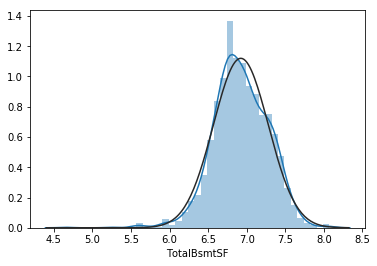

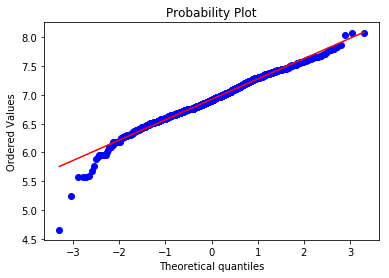

In [18]:
sns.distplot(data[data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(data[data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

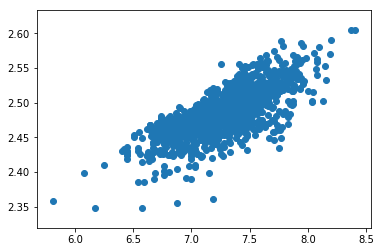

In [19]:
plt.scatter(data['GrLivArea'], data['SalePrice']);

As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

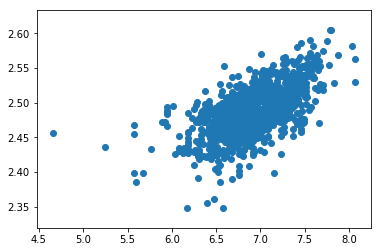

In [20]:
#scatter plot
plt.scatter(data[data['TotalBsmtSF']>0]['TotalBsmtSF'], data[data['TotalBsmtSF']>0]['SalePrice']);

In [21]:
#convert categorical variable into dummy
data = pd.get_dummies(data)
data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
data=data.drop['Id']
train,test=train_test_split(data,random,)